<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q geopandas
!pip install -q mapclassify

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import mapclassify
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gp

In [0]:
stations_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")

In [4]:
stations_df.shape

(389, 11)

In [5]:
stations_df.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


In [0]:
inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")

In [7]:
inmetr_df.shape

(14528638, 17)

In [8]:
df = pd.merge(stations_df, inmetr_df, on='id')
df

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 00:00:00,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 12:00:00,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
2,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 18:00:00,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN
3,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-05 00:00:00,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.00,2.4,88.25,NaN
4,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-05 12:00:00,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14528633,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-29 12:00:00,5.0,21.5,NaN,NaN,20.9,86.0,945.2,1011.5,5.0,1.02888,NaN,10.00,NaN,NaN,NaN
14528634,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-30 00:00:00,NaN,22.3,NaN,30.2,NaN,97.0,945.0,1011.9,0.0,0.00000,9.0,7.50,NaN,NaN,0.0
14528635,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-30 12:00:00,1.7,26.0,NaN,NaN,21.2,76.0,944.7,1011.2,0.0,0.00000,NaN,6.25,NaN,NaN,NaN
14528636,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-31 00:00:00,NaN,23.2,NaN,30.0,NaN,90.0,945.2,1011.7,0.0,0.00000,0.0,10.00,NaN,NaN,0.0


In [0]:
!wget http://www.usp.br/nereus/wp-content/uploads/Brasil.zip -O Brasil.zip
!unzip Brasil.zip

In [0]:
map_df = gp.read_file('UFEBRASIL.shp')
map_df['uf'] = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PA', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 
                'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']
measu_by_uf_df = df.groupby(['uf']).size().reset_index(name='measurements_by_uf')
map_df = pd.merge(map_df, measu_by_uf_df, on='uf')

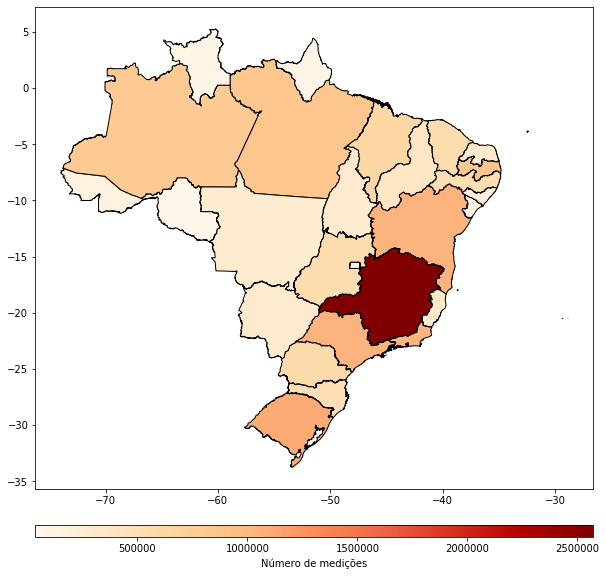

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="2.5%", pad=0.5)
map_df.plot(column='measurements_by_uf', 
            cmap='OrRd', 
            edgecolor='black',
            #scheme='quantiles',
            legend=True, 
            cax=cax, 
            ax=ax,
            legend_kwds={'label': "Número de medições", 'orientation': "horizontal"}
            )